# Desarrollo en Serie de Fourier de señales periódicas

En este cuaderno veremos algunos de los espectros de señales vistos en clase y cómo se puede aproximar una señal cualquiera con sumas de sinusoides.

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Copiar del cuaderno anterior
def plot_espectro_amplitud(espectro):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    '''
    ncompo = len(espectro)
    amplitudes = np.zeros(ncompo)
    frecuencias = np.zeros(ncompo)
    for k in range(ncompo):
        amplitudes[k] = espectro[k][1]
        frecuencias[k] = espectro[k][0]
    amplitudes=np.absolute(amplitudes)
    _=plt.stem(frecuencias,np.abs(amplitudes), markerfmt=" ")
    _=plt.title('Espectro de amplitud')
    _=plt.xlabel('frecuencia')
    _=plt.xlim([-0.1*np.max(frecuencias),1.2*np.max(frecuencias)]) 
    _=plt.grid()

In [3]:
# Copiar del cuaderno anterior

def sumaTonos(espectro,t):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    Devuelve un array de numpy con tantas columnas como elementos tenga el espectro
    Cada una de ellas es una componente frecuencial
    
    La señal suma se puede obtener haciendo np.sum(out,axis=1)
    '''
    
    # La señal suma se puede obtener haciendo np.sum(,axis=1)
    
      
    ncomponentes = len(espectro)
    out=np.zeros((t.size,ncomponentes))
    for k in range(ncomponentes):
        frecuencia = espectro[k][0]
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
        out [:,k]= amplitud * np.cos(2*math.pi*frecuencia*t + fase)
    return out

## Señal cuadrada

Comenzaremos creando una función que genere una onda cuadrada a partir de una señal sinusoidal.
Simplemente la señal valdrá uno cuando la sinusoide *subyacente* valga >=0 y 0 en caso contrario.

In [4]:
def ondaCuadrada(frecuencia,tiempo):
    #Genera una onda cuadrada "analogica"
    # Internamente genera una sinusoide y pone a 1 los valores positivos y a cero los negativos
    
    # frecuencia: inversa del periodo
    z=np.cos(2*math.pi*frecuencia*tiempo);
    zu=(z>0).astype('float64')
    return zu

Periodo= 0.5


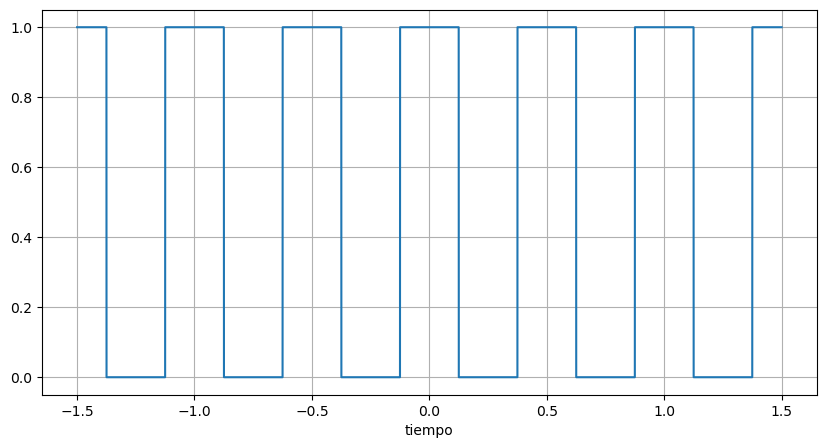

In [5]:
frecuencia = 2
periodo = 1/frecuencia
print('Periodo=', periodo)
t=np.linspace(-1.5,1.5,50000)
s=ondaCuadrada(2,t)
_=plt.plot(t,s)
_=plt.grid()
_=plt.xlabel('tiempo')

In [6]:
## OJO: La fórmula del sinc es para cuando se tienen frecuencias positivas y negativas (fasores)
# En el caso de cosenos, las frecuencias distintas de cero llevan un factor 2
# Para el caso de DC el factor 2 no es necesario

def espectro_cuadrada(numcomponentes,f0):
    '''
    Función que devuelve el espectro unilateral de una onda cuadrada como
    lista de tuplas (frec,ampl,fase)
    '''
    
    componentes=np.arange(numcomponentes)
    espectro=[]
    
    # Valores correspondientes al tren de pulso visto en teoria
    periodo = 1/f0
    ancho_pulso = periodo/2
    A = 1
    
    for k in componentes:
        fase = 0
        if k==0:
            amplitud = ancho_pulso/periodo*A
            componente =(0,amplitud,fase)
        else:
            amplitud = 2*A*ancho_pulso/periodo*np.sinc(ancho_pulso/periodo*k)# El factor 2 es por que hay frec pos y neg
            if amplitud < 0: # explicar
                amplitud = -amplitud
                fase=math.pi
            frecuencia = k * f0
            componente =(frecuencia,amplitud,fase)
        espectro.append(componente)
    
    return espectro


In [7]:
#Calculemos el espectro de la onda cuadrada
espectro=espectro_cuadrada(100,frecuencia)
espectro[:7]

[(0, 0.5, 0),
 (2, 0.6366197723675814, 0),
 (4, 3.8981718325193755e-17, 0),
 (6, 0.2122065907891938, 3.141592653589793),
 (8, 3.8981718325193755e-17, 3.141592653589793),
 (10, 0.12732395447351627, 0),
 (12, 3.8981718325193755e-17, 0)]

Observar que:

* Las frecuencias son todos los múltiplos de 2.

* Las amplitudes de los armónicos pares (excepto f=0) son prácticamente nulos.

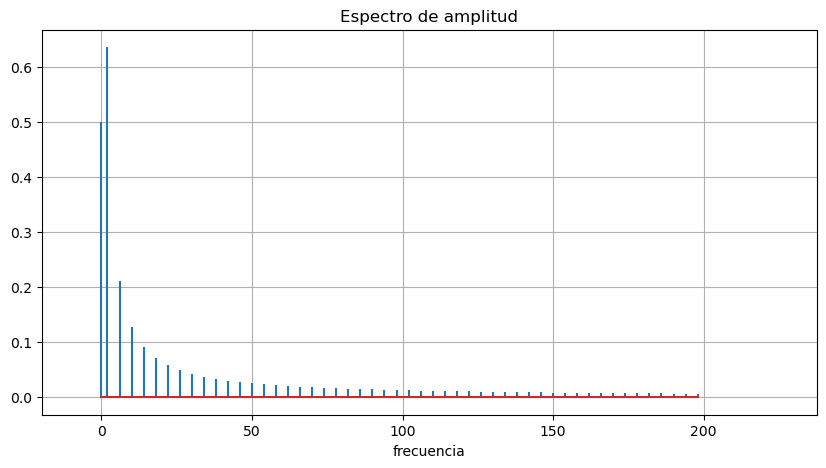

In [8]:
plot_espectro_amplitud(espectro)

### Reconstrucciones parciales

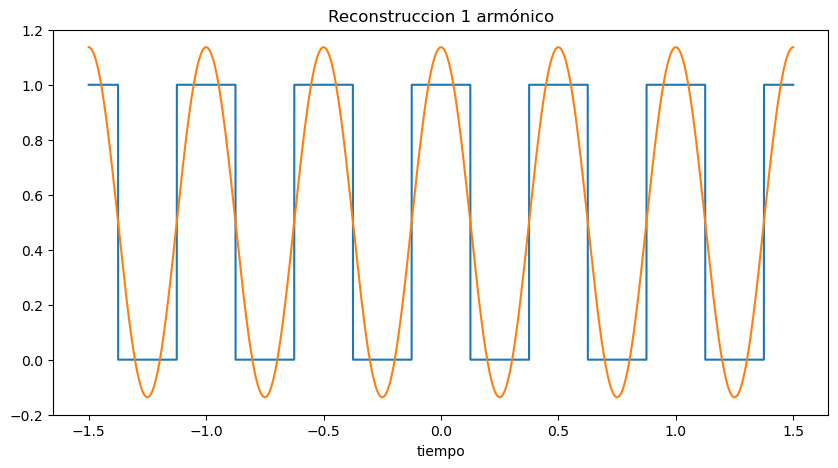

In [9]:
_=plt.plot(t,s)
rec1=np.sum(sumaTonos(espectro[:2],t),axis=1)
_=plt.plot(t,rec1)
_=plt.title('Reconstruccion 1 armónico')
_=plt.xlabel('tiempo')

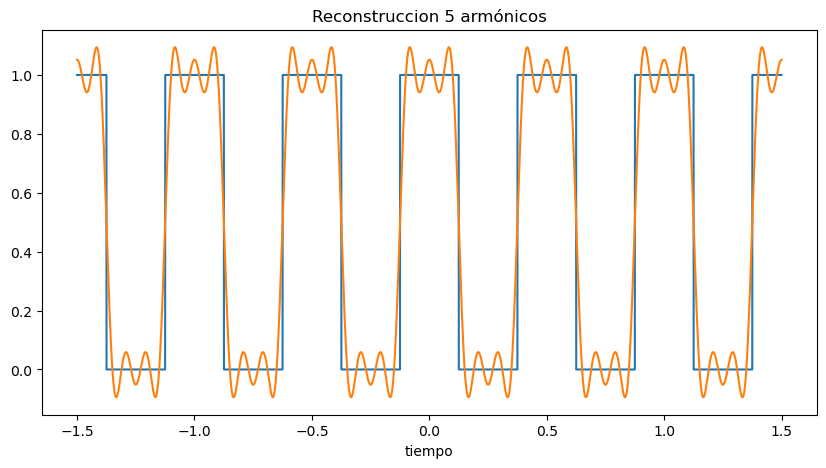

In [10]:
_=plt.plot(t,s)
rec5=np.sum(sumaTonos(espectro[:6],t),axis=1)
_=plt.plot(t,rec5)
_=plt.title('Reconstruccion 5 armónicos')
_=plt.xlabel('tiempo')

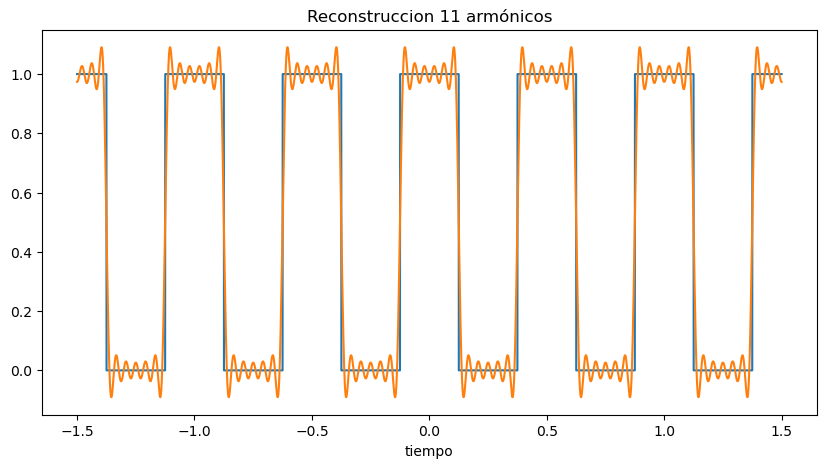

In [11]:
_=plt.plot(t,s)
rec11=np.sum(sumaTonos(espectro[:12],t),axis=1)
_=plt.plot(t,rec11)
_=plt.title('Reconstruccion 11 armónicos')
_=plt.xlabel('tiempo')

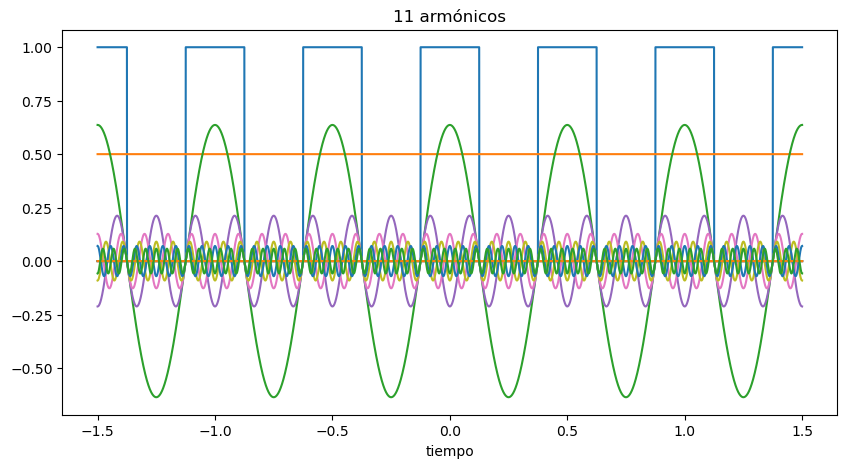

In [12]:
_=plt.plot(t,s)
rec11=sumaTonos(espectro[:12],t)
_=plt.plot(t,rec11)
_=plt.title('11 armónicos')
_=plt.xlabel('tiempo')

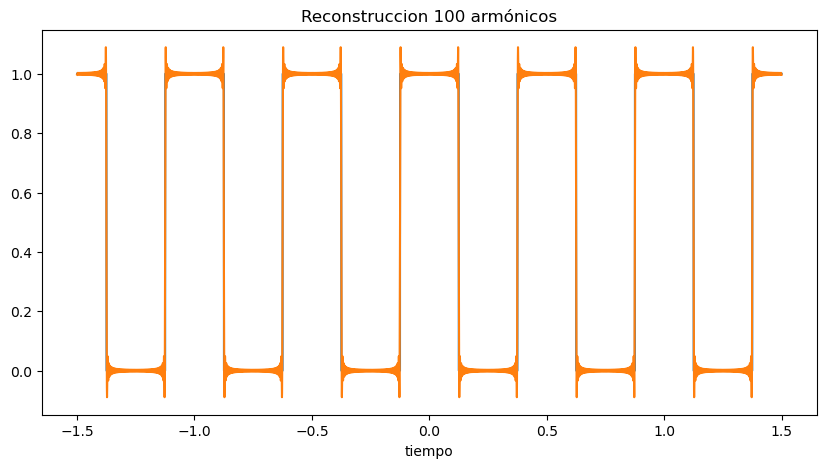

In [13]:
_=plt.plot(t,s)
rec100=np.sum(sumaTonos(espectro,t),axis=1)
_=plt.plot(t,rec100)
_=plt.title('Reconstruccion 100 armónicos')
_=plt.xlabel('tiempo')

### Observaciones
* Conforme aumenta la frecuencia, la amplitud de los armónicos va decreciendo
* En este caso los armónicos pares de frecuencia $2k f_0$ son nulos.
* La amplitud de la frecuencia 0 coincide con el valor medio 0.5
* Al aumentar el número de armónicos
  * Disminuye el error cuadrático medio
  * El valor de pico del error no decrece.
  * Este fenómeno se denomina *Fenómeno de* **Gibbs** 

In [14]:
print('Error de pico reconst 5 armónicos:',np.max(np.abs(s-rec5)))
print('Error de pico reconst 100 armónicos:',np.max(np.abs(s-rec100)))

Error de pico reconst 5 armónicos: 0.4999399988000963
Error de pico reconst 100 armónicos: 0.49899998054798084


In [15]:
print('Error cuadrático medio reconst 5 armónicos:',np.mean(np.square(s-rec5)))
print('Error cuadrático medio reconst 100 armónicos:',np.mean(np.square(s-rec100)))

Error cuadrático medio reconst 5 armónicos: 0.016735838048983466
Error cuadrático medio reconst 100 armónicos: 0.0010131546730615638


# Espectro de la señal comprimida en el tiempo.

En teoría se estudió que si una señal se comprime en el tiempo, su espectro:

* Conserva las amplitudes de cada componente.

* Conserva las fases de cada componente.

* Las frecuencias de cada componente se multiplican por el factor de compresión temporal. En otras palabras, si una señal se *comprime* para que dure la mitad, cada una de las componentes frecuenciales de la señal comprimida tendrá una frecuencia doble que la de la original. En ese sentido se suele decir que **si una señal se comprime en el tiempo por un factor, se expandirá en frecuencia por el mismo factor**

En este apartado, implementaremos una función que reciba como entrada el espectro de una señal y devuelva el espectro de la señal comprimida en el tiempo por ese factor.


In [16]:
def espectro_compresion(espectro,factor):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    factor: factor de compresión temporal. Si factor==2, la señal dura la mitad
    Devuelve: el espectro correspondiente a la señal de salida
    '''
        
      
    ncomponentes = len(espectro)
    out=[]
    for k in range(ncomponentes):
        frecuencia = espectro[k][0] *factor
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
       
        out.append( (frecuencia, amplitud, fase) )
    return out

## Comprobación

Probaremos la función anterior aplicándola al espectro de la onda cuadrada

In [17]:
factor = 2
esp_comprimida = espectro_compresion(espectro,factor)
print(esp_comprimida[:11])

[(0, 0.5, 0), (4, 0.6366197723675814, 0), (8, 3.8981718325193755e-17, 0), (12, 0.2122065907891938, 3.141592653589793), (16, 3.8981718325193755e-17, 3.141592653589793), (20, 0.12732395447351627, 0), (24, 3.8981718325193755e-17, 0), (28, 0.09094568176679733, 3.141592653589793), (32, 3.8981718325193755e-17, 3.141592653589793), (36, 0.0707355302630646, 0), (40, 3.898171832519376e-17, 0)]


In [18]:
sum2 = np.sum(sumaTonos(esp_comprimida,t),axis=1)

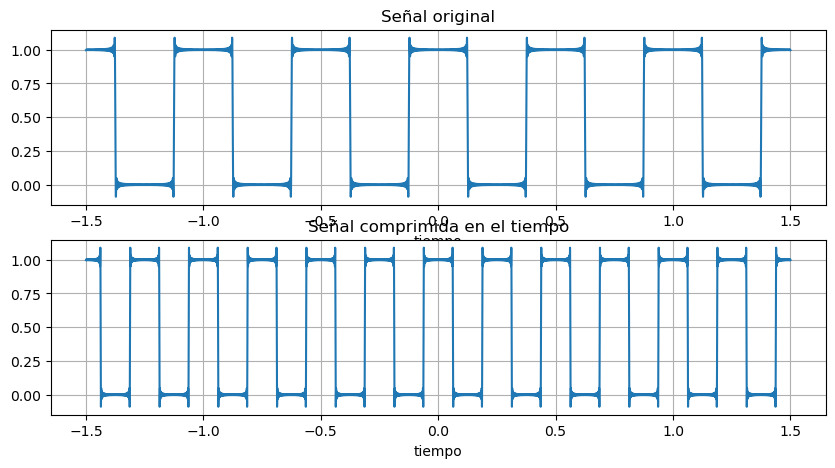

In [19]:
_=plt.subplot(2,1,1)
_=plt.plot(t,rec100)
_=plt.grid()
_=plt.title('Señal original')
_=plt.xlabel('tiempo')

_=plt.subplot(2,1,2)
_=plt.plot(t,sum2)
_=plt.grid()
_=plt.title('Señal comprimida en el tiempo')
_=plt.xlabel('tiempo')


**Comprobación**

Si la función está bien:

* El valor en t=0 de la señal comprimida debe coincidir con el de la señal original (centro del pulso alto)

* El centro del primer pulso superior inmediatamente a la derecha de t=0 que antes de comprimir estaba en t=0.5, debe estar en 0.25 (factor=2)

# Ejercicios propuestos
## Generar el espectro de una señal retrasada
El objetivo de este ejercicio es dado el espectro de una señal, obtener el espectro correspondiente a la misma señal retrasada "t0".
Seguidamente se comprobará que la suma de las componentes espectrales corresponde a una señal retrasada.

In [20]:
def espectro_retardo(espectro,t0):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    t0: retardo a aplicar
    
    Devuelve el espectro de la señal retrasada como lista de tuplas (frec,ampl,fase)
    '''
        
      
    ncomponentes = len(espectro)
    out=[]
    for k in range(ncomponentes):
        frecuencia = espectro[k][0] 
        amplitud = espectro[k][1]
        fase = espectro[k][2]  - 2*np.pi*frecuencia*t0    
       
        out.append( (frecuencia, amplitud, fase) )
    return out

### Comprobación del funcionamiento

In [21]:
# Tomamos como espectro el de la señal cuadrada
# Su frecuencia era 2 --> su periodo era 0.5
# Retrasaré la señal 
t0=0.05
esp2= espectro_retardo(espectro,t0);

In [22]:
Sret =sumaTonos(esp2,t);
ret=np.sum(Sret,axis=1)


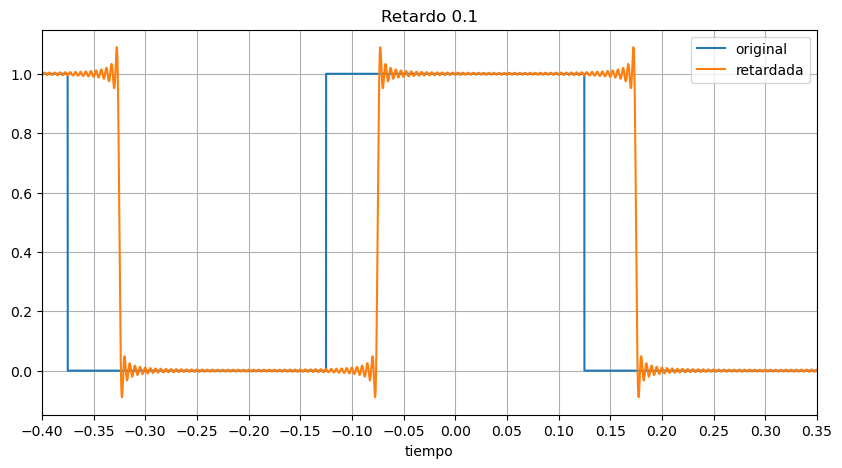

In [23]:
kk=plt.plot(t,s)
kk=plt.plot(t,ret)
kk=plt.legend(['original','retardada'])
kk=plt.title('Retardo 0.1')
kk=plt.xlabel('tiempo')
kk=plt.xlim(-0.3,0.3)
kk=plt.grid()
kk=plt.xticks(np.arange(-0.4,0.4,0.05))


# Ejecicios propuestos

## Ejemplo sinusoide rectificada  onda completa

In [24]:
# Definición de funciones para obtener señal en el tiempo



def seno_fullRectified(frecuencia,tiempo):
    #Genera una onda cuadrada "analogica"
    # Internamente genera una sinusoide y pone a 1 los valores positivos y a cero los negativos
    z=np.abs(np.sin(2*math.pi*frecuencia*tiempo))

    return z

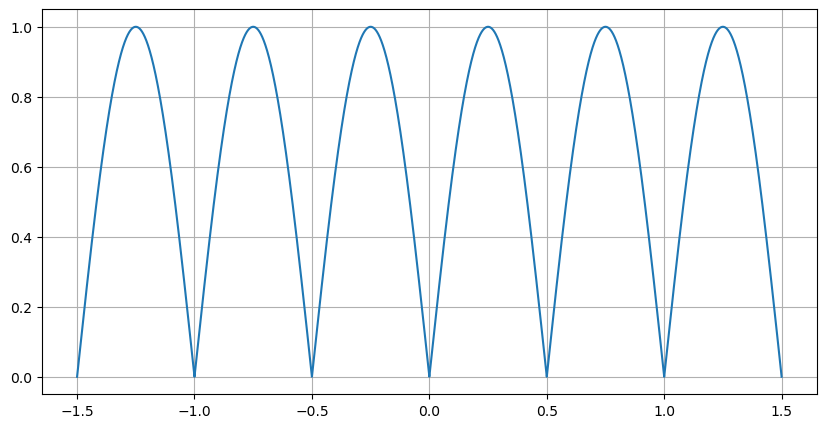

In [25]:
t=np.linspace(-1.5,1.5,50000)
s=seno_fullRectified(1,t)
_=plt.plot(t,s)
_=plt.grid()

¿Qué periodo tiene la señal resultado de rectificar una sinusoide de frecuencia = 1?

¿A qué frecuencia fundamental corresponde?

La expresión de los coeficientes **bilaterales** vale

<img src="images/Coefs_DSF_OndaCompleta.png" width=200>

y cero para $n$ impar.

Obsérvese que si considero que la frecuencia fundamental es 1, como en realidad la frecuencia fundamental es 2, solo los armónicos pares serán distintos de cero!!!

In [36]:
def espectro_seno_rectificado_completa(numcomponentes,f0):

    '''
    Función que devuelve el espectro unilateral de una onda senoidal rectificada  como
    lista de tuplas (frec,ampl,fase)
    '''
    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    amplitudes = 0.0*ks # Todo ceros
    amplitudes[0::2]=2/math.pi/(1-ks[0::2]**2) # Los pares: Esto sale de la fórmula
    # Lo anterior son bilaterales. Para pasar a unilateral multiplico por 2 excepto el primero
    amplitudes[1:] *= 2.0 
   
    fases=ks*0

    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
    return espectro

In [37]:
espectro_seno_rect=espectro_seno_rectificado_completa(20,1)
stonos = sumaTonos(espectro_seno_rect,t)
rec1=np.sum(stonos[:,0:2],axis=1)
rec2=np.sum(stonos[:,0:3],axis=1)
rec4=np.sum(stonos[:,0:5],axis=1)
rec8=np.sum(stonos[:,0:9],axis=1)

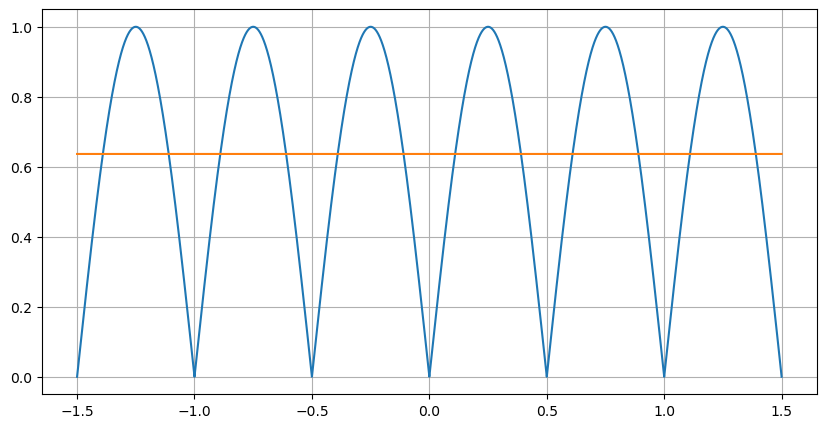

In [28]:
_=plt.plot(t,s)
_=plt.plot(t,rec1)
_=plt.grid()

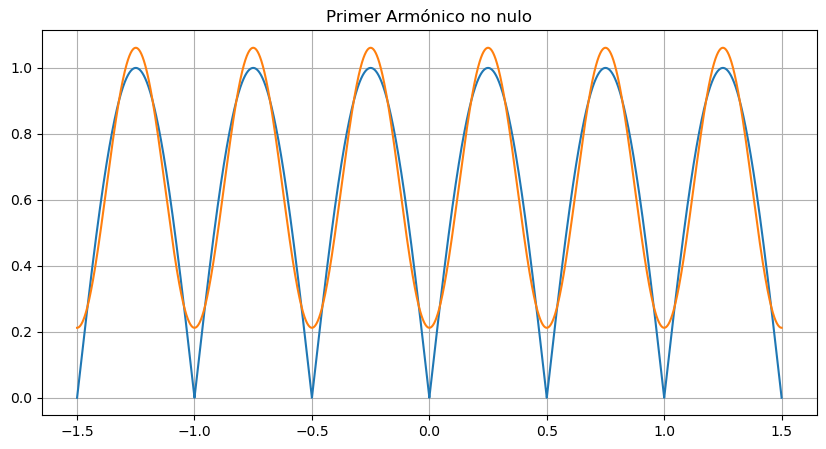

In [29]:
_=plt.plot(t,s)
_=plt.plot(t,rec2)
_=plt.grid()
_=plt.title('Primer Armónico no nulo')

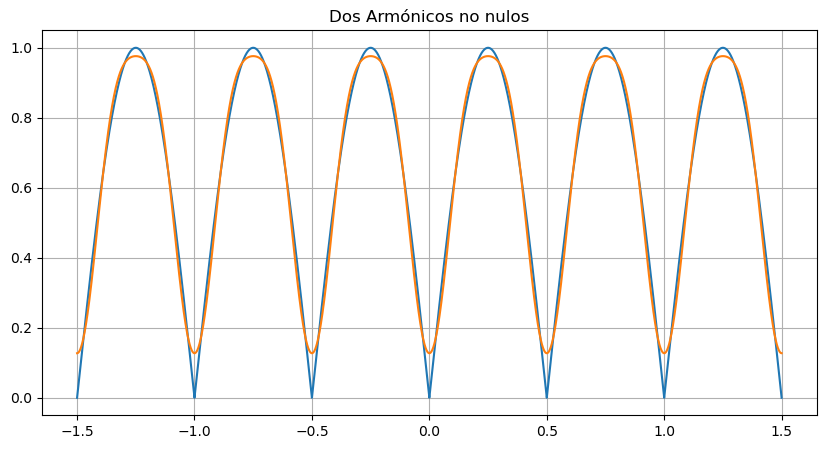

In [30]:
_=plt.plot(t,s)
_=plt.plot(t,rec4)
_=plt.title('Dos Armónicos no nulos')
_=plt.grid()

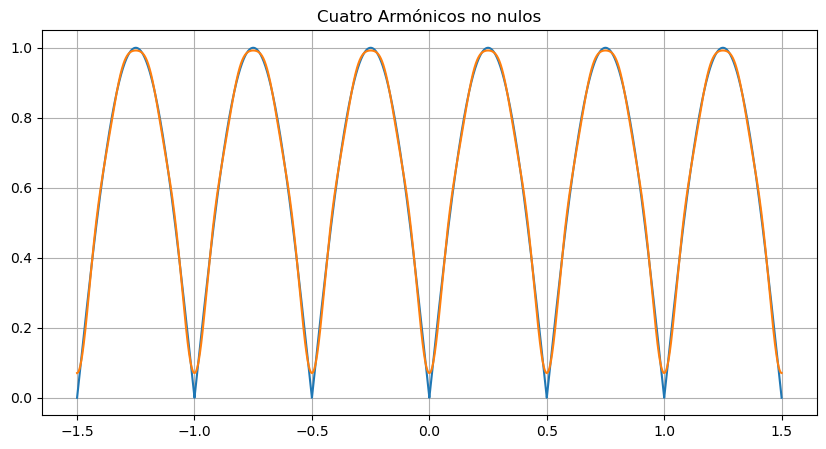

In [31]:
_=plt.plot(t,s)
_=plt.plot(t,rec8)
_=plt.title('Cuatro Armónicos no nulos')
_=plt.grid()

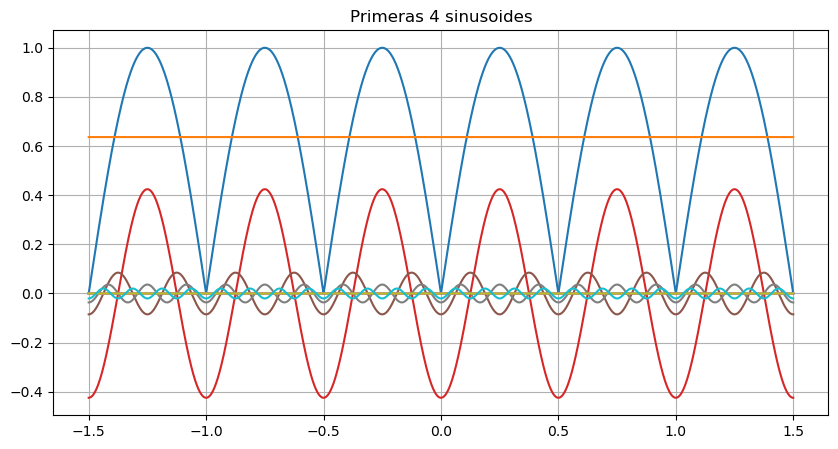

In [34]:
_=plt.plot(t,s)
_=plt.plot(t,stonos[:,0:9])
_=plt.grid()
_=plt.title('Primeras 4 sinusoides')

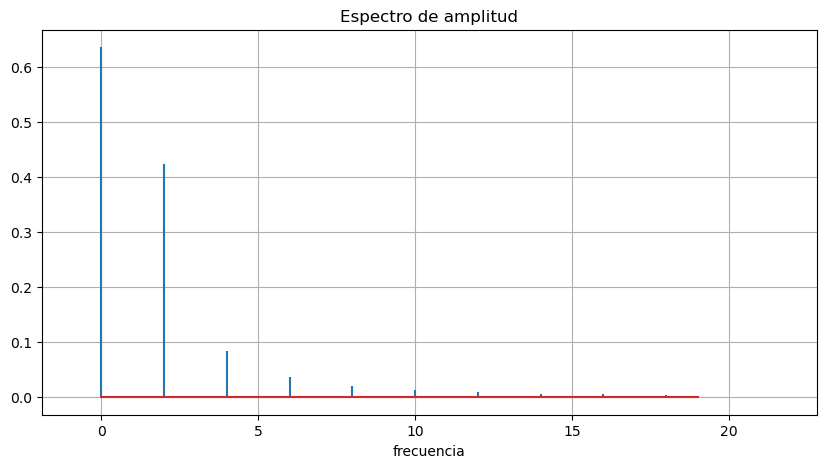

In [38]:
plot_espectro_amplitud(espectro_seno_rect)